**Load the "titanic" dataset in seaborn <https://github.com/mwaskom/seaborn-data> and set "survived" as the dependent variable.**

**You should prepare a tutorial for this part. Your tutorial should include the following:**

- **Loading the dataset and setting up the dependent variable**
- **Writing the code for each classification method**
- **Printing the output and interpreting the results**
- **Summarizing the findings and discussing the pros and cons of each method**

# (Loading dataset and other prep)

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Loading the data (and some EDA)

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Cleaning the data (and other prep)

Looking at the column information (and dataset description by seaborn/kaggle) there is some redundant information, such as:

- "sex" = "who"

- "sibp"/"parch" and "alone" ("alone" can be derived based on the information in 'sibp' and 'parch')

- "age"/"sex" and "adult_male" (the latter can be derived based on the other two)

- "survived" = "alive" [This is important! Since we're setting "survived" as the (only) dependent variable. So setting "alive" as an independent variable is going to affect our performance results.]

- "embarked" = "embark_town"

- "pclass" = "class"

Unfortunately, there aren't any columns similar or equivalent to "deck," but because there's SO much data in that column missing (and supervised models can't use missing values), I think I will still drop it in the end.

In [4]:
df = df[['survived','pclass','sex','age','sibsp','parch','fare','embarked']]
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


And models in sklearn/Python can only use numeric data, so I need to do something about the non-numeric (qualitative data written in text). Fortunately, sklearn provides an easy way to encode data. (So I can change qualitative data to 1, 2, 3, etc.)

In [6]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

According to the dataset description on Kaggle, C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
from sklearn.preprocessing import LabelEncoder

for col in ['sex','embarked']:
    encoder = LabelEncoder()
    encoded_col = encoder.fit_transform(df[col])

    df[col] = encoded_col

In [8]:
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


None

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


(so if you compare the newly encoded df with the original we see the "female" = 0 and "male" = 1 in the "sex" column. And then for the "embark" column: "C" (Cherbourg) = 0, "S" (Southampton) = 2, and so "Q" (Queenstown) = 1.

And lastly, as mentioned earlier, supervised models cannot deal with missing data, so I have two options fill (some of) the missing data with a potentially reasonable substitute (mean value, etc.) or drop the missing rows entirely. 

In [9]:
# option 1: fill missing 


In [10]:
# option 2: drop all missing rows
df2 = df.dropna()
display(df2.info())
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     714 non-null    int64  
 5   parch     714 non-null    int64  
 6   fare      714 non-null    float64
 7   embarked  714 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.2 KB


None

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.634454,29.699118,0.512605,0.431373,34.694514,1.599440
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930,0.781483
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000,2.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.741700,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000,2.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,3.000000


## Selecting `X` & `y` (independent & dependent variables)

So based on that information, I will select the independent variables as follows (and we're told what to use for the dependent variable)

In [11]:
X_col = ['pclass','sex','age','sibsp','parch','fare','embarked']       # independent variable
y_col = ['survived']                                                   # dependent variable

In [12]:
X = df2[X_col]
y = df2[y_col]

## Creating training and testing sets

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)    # 80-20 train-test split

In [14]:
X_train.shape

(571, 7)

In [15]:
X_test.shape

(143, 7)

# Question 1

**Conduct a Decision Tree analysis using scikit-learn library.**

In [16]:
from sklearn.tree import DecisionTreeClassifier

#instatiate the model
dt_classifier = DecisionTreeClassifier()

# "Train" (fit) the model
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
# Make prediction for testing
dt_pred = dt_classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        91
           1       0.70      0.58      0.63        52

    accuracy                           0.76       143
   macro avg       0.74      0.72      0.72       143
weighted avg       0.75      0.76      0.75       143



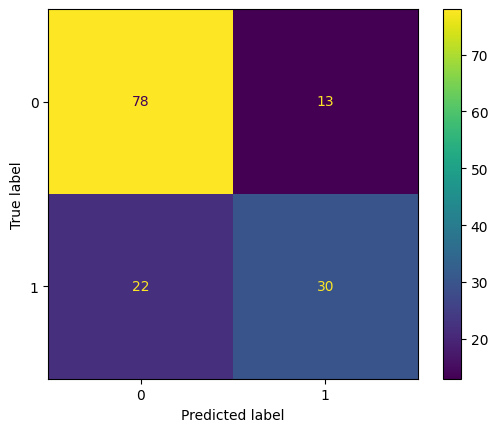

In [18]:
# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, dt_pred))
cm_disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, dt_pred),
                                    display_labels = dt_classifier.classes_)
cm_disp.plot()

(According to the dataset description: 0 = Not Survived, 1 = Survived. (Not critical information right now, but potentially helpful))

# Question 2

**Conduct a Logistic Regression analysis using scikit-learn library.**

In [19]:
# some functions to quicken the repetitive process
def fit_model(model):
    classifier = model
    classifier.fit(X_train,y_train)
    return classifier

def test_pred(fitted_model):              # I keep getting an error, whenever I tried to use this one, 
    return fitted_model.predict(X_test)   # so I ended up not using it in the end (but tbh I'm not really sure why it wasn't working)

def eval_performance(pred_df,fitted_model):
    print('Performance of {}:'.format(fitted_model))
    print(classification_report(y_test, pred_df))
    cm_disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, pred_df),
                                        display_labels = fitted_model.classes_)
    cm_disp.plot()
    plt.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Performance of LogisticRegression():
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        91
           1       0.73      0.63      0.68        5

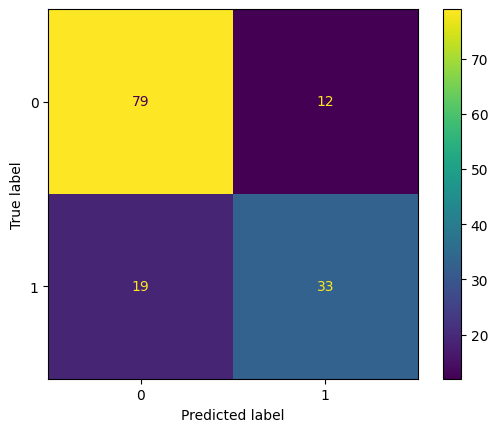

In [20]:
from sklearn.linear_model import LogisticRegression

# instatiate and train
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train,y_train)

# Make prediction for testing
logreg_pred = logreg_classifier.predict(X_test)   #test_pred(logreg_classifier)

# Evaluate performance
eval_performance(logreg_pred,logreg_classifier)

# Question 3

**Conduct a KNN analysis using scikit-learn library.**

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Performance of KNeighborsClassifier(n_neighbors=15):
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        91
           1       0.62      0.50      0.55        52

    accuracy                           0.71       143
   macro avg       0.68      0.66      0.67       143
weighted avg       0.70      0.71      0.70       143



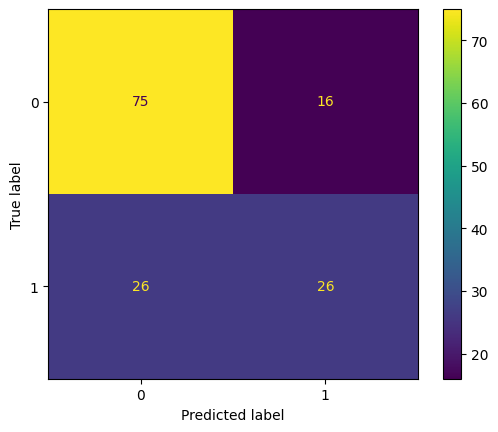

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = fit_model(KNeighborsClassifier(n_neighbors=15))

# Make prediction for testing
knn_pred = knn_classifier.predict(X_test)   

# Evaluate performance
eval_performance(knn_pred,knn_classifier)

# Question 4

**Conduct an SVM analysis using scikit-learn library.**

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Performance of SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        91
           1       0.74      0.60      0.66        52

    accuracy                           0.78       143
   macro avg       0.77      0.74      0.75       143
weighted avg       0.77      0.78      0.77       143



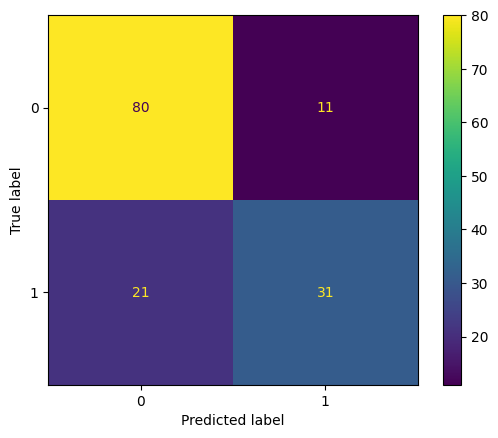

In [22]:
from sklearn import svm

# instantiate and train
svm_classifier = fit_model(svm.SVC(kernel='linear'))

# Make prediction for testing
svm_pred = svm_classifier.predict(X_test) #test_pred(svm_classifier)

# Evaluate performance
eval_performance(svm_pred,svm_classifier)

# Question 5 

**Summarize your findings. Explain the results of each method, compare their performance, and discuss the pros and cons of each method.**

There was no model that had DRASTICALLY different performance results. All did relatively similarly (although I didn't extensively try different values of k for KNN, so there was a possibility to see some more variety for that model had I taken more time to mess around with it). But for the most part, all the models seemed to do best in correctly predicting those who did not survive. (It also generally predicted that "not-survived" (0) more than "survived"(1) which can also tell us about the data if we didn't really know about the data already (i.e. potential imbalance in the data)). 

Pros and Cons:

...

# Question 6 (optional)

**Conduct other classification methods for "survived" using scikit-learn library or other relevant libraries.**

# Question 7 (optional)

**Play with other dependent variables and see how different variables affect the prediction performance.**

# Question 8 (optional)

**Use the "penguins" dataset in seaborn to predict species and compare the performance of different classification methods.**